## Analysing the crossmapping fraction of reads against the custom database

In [1]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord as SR
from Bio.Blast import NCBIXML
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import AlignIO
from Bio.Align import AlignInfo
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import random
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
# from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")

import re

_nsre = re.compile('([0-9]+)')
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower()
            for text in re.split(_nsre, s)] 

In [2]:
large_frame = pd.read_csv("../../analysis/Alignment/database.csv", header=0, index_col=0, engine='python')
large_frame

,Puccinia_striiformis-tritici,Geotrichum_candidum,Rhodotorula_mucilaginosa,Cortinarius_globuliformis,Cryptococcus_zero,Quambalaria_cyanescens,Yarrowia_lipolytica,Tuber_brumale,Diaporthe_unidentified,Asteroma_CCL060,...,Candida_albicans,Candida_unidentified,Cryptococcus_gattii,Candida_parapsilosis,Candida_metapsilosis,Candida_orthopsilosis,Yamadazyma_mexicana,Yamadazyma_scolyti,Debaryomyces_unidentified,Meyerozyma_guilliermondii
Puccinia_striiformis-tritici,NaN,63.080,79.119,77.724,78.490,78.029,67.484,74.459,72.815,72.503,...,74.129,74.597,72.674,75.689,75.569,75.603,74.991,74.607,76.313,75.231
Geotrichum_candidum,63.080,NaN,64.659,65.081,65.344,64.476,67.220,65.202,64.461,64.048,...,67.026,67.211,66.369,67.898,67.352,67.294,68.555,68.902,67.022,66.816
Rhodotorula_mucilaginosa,79.119,64.659,NaN,79.211,79.896,80.212,68.029,75.752,74.743,76.012,...,76.862,75.984,73.566,76.588,76.513,76.778,77.567,76.897,76.831,77.115
Cortinarius_globuliformis,77.724,65.081,79.211,NaN,80.495,81.594,68.569,77.239,75.299,75.094,...,75.974,76.324,73.562,76.863,75.658,76.291,76.726,76.553,77.186,77.125
Cryptococcus_zero,78.490,65.344,79.896,80.495,NaN,81.750,68.776,76.334,75.360,75.351,...,77.435,77.648,74.179,76.547,76.704,76.610,77.659,77.304,77.622,76.724
Quambalaria_cyanescens,78.029,64.476,80.212,81.594,81.750,NaN,68.664,77.296,76.607,75.974,...,76.863,76.878,73.283,77.178,76.939,76.920,77.117,78.259,77.945,77.801
Yarrowia_lipolytica,67.484,67.220,68.029,68.569,68.776,68.664,NaN,68.829,68.166,68.332,...,72.129,72.986,69.777,72.280,72.393,72.178,71.394,71.414,71.718,71.261
Tuber_brumale,74.459,65.202,75.752,77.239,76.334,77.296,68.829,NaN,78.803,78.469,...,79.386,78.696,75.352,79.780,79.808,81.128,80.711,79.352,81.909,82.085
Diaporthe_unidentified,72.815,64.461,74.743,75.299,75.360,76.607,68.166,78.803,NaN,94.821,...,77.279,77.218,72.843,76.362,77.340,76.422,77.375,77.260,77.747,77.766
Asteroma_CCL060,72.503,64.048,76.012,75.094,75.351,75.974,68.332,78.469,94.821,NaN,...,77.587,76.831,73.046,76.380,76.003,76.080,77.375,76.781,77.414,77.425


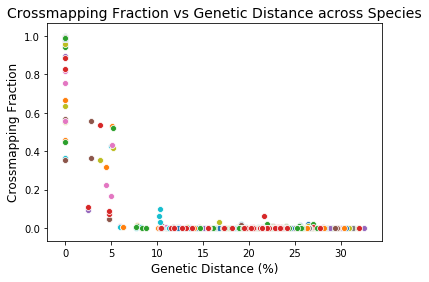

In [6]:
import glob
path = "/media/MassStorage/tmp/TE/honours/analysis/Mapping/custom_results/*.json"
path_names = glob.glob(path)
for path in path_names:
    template_frame = pd.DataFrame(data=None, columns = ['Species Name','Genetic Distance','Crossmapping Fraction'])
    if path[71:-23] != 'unclassified':
        if '20171212_FAH18688/barcode10' not in path and '20171207_FAH18654/barcode10' not in path:
#             print(path[66:-5])
            match_dist = pd.read_json(path, orient='index')
            match_dist.rename(index={"oculimacula_yallundae-ccl029": "oculimacula_yallundae-CCL029", 
                                     "oculimacula_yallundae-ccl031": "oculimacula_yallundae-CCL031",
                                    "diaporthe_ccl067": "diaporthe_CCL067",
                                    "asteroma_ccl060": "asteroma_CCL060",
                                    "asteroma_ccl068": "asteroma_CCL068"}, inplace=True)
#             print(match_dist)
            for element in match_dist.index:
                path = path.replace('ccl','CCL')
                path_cap = path[66:67].upper() + path[67:-5]
                element_cap = element[:1].upper() + element[1:]
                tmp = pd.DataFrame(data=[[element,
                                          large_frame[large_frame.index == path_cap][element_cap].values[0],
                                          match_dist[match_dist.index == element].values[0][0]]],
                                   columns=['Species Name','Genetic Distance','Crossmapping Fraction'])
                template_frame = template_frame.append(tmp,ignore_index=True)
            template_frame = template_frame.set_index('Species Name')
            for element in template_frame.index:
#                 print(element)
                if np.isnan(template_frame.at[element,'Genetic Distance']):
                    template_frame.at[element,'Genetic Distance'] = 0
                else:
                    template_frame.at[element,'Genetic Distance'] = 100-template_frame.at[element,'Genetic Distance']
#             print(template_frame)
            plt.rcParams["axes.labelsize"] = 12
            figures = sns.scatterplot(x=template_frame['Genetic Distance'],y=template_frame['Crossmapping Fraction'])
            figures.set_title("Crossmapping Fraction vs Genetic Distance across Species", fontsize=14)
            figures.set_xlabel("Genetic Distance (%)")
            ax = figures.get_figure()
            ax.savefig("../../analysis/Stats/crossmapvsgendist.png")